# I. Load data

In [8]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import matplotlib.ticker as mtick


# Fetch the CSV file inside the assignment folder in the PFDA-courseware repository & read it into a pandas DataFrame
csv_url = 'https://raw.githubusercontent.com/andrewbeattycourseware/PFDA-courseware/refs/heads/main/assignment/weatherreadings1.csv'

df = pd.read_csv(csv_url)

# Change pandas' settings so all cols in the DataFrame are displayed
pd.set_option('display.max_columns', None)

# Display the first five rows
df.head()

,siteId,reportStartDateTime,reportEndDateTime,collectionName,isPublic,isLatestVersion,observationType,softwareType,windDirection,relativeHumidity,windSpeed_MilePerHour,windSpeed_MetrePerSecond,dryBulbTemperature_Fahrenheit,dryBulbTemperature_Celsius,wetBulbTemperature_Fahrenheit,wetBulbTemperature_Celsius,rainfallAmount_Inch,rainfallAmount_Millimetre,rainfallRate_InchPerHour,rainfallRate_MillimetrePerHour,airPressure_InchOfMercury,airPressure_Hectopascal,dewPointTemperature_Fahrenheit,dewPointTemperature_Celsius,isOfficial,isDcnn,longitude,latitude,height,id,localReportEndDateTime,externalSiteId,createdDateTime,version,externalId
0,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:15:00+00:00,2024-10-02T16:15:00+00:00,1,True,True,1,WeatherLink,322,70.4,3.06,1.367940,60.7,15.944444,54.4,12.444444,0,0,0,0,29.962,1014.629872,51.0,10.555556,False,False,-8.8545,53.5244,45,20241002oarq1xwy5re69kyhyyguw31uhh,2024-10-02T16:15:00+00:00,1000013318,2024-10-02T16:15:28.5671119+00:00,1,12577570561
1,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:45:00+00:00,2024-10-02T16:45:00+00:00,1,True,True,1,WeatherLink,327,72.4,2.81,1.256180,60.4,15.777778,54.7,12.611111,0,0,0,0,29.961,1014.596008,51.5,10.833333,False,False,-8.8545,53.5244,45,20241002zafpyewy5we69kyhyytrtenn4a,2024-10-02T16:45:00+00:00,1000013318,2024-10-02T16:45:40.4251616+00:00,1,12577595550
2,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:00:00+00:00,2024-10-02T17:00:00+00:00,1,True,True,1,WeatherLink,27,73.4,2.56,1.144421,59.2,15.111111,53.8,12.111111,0,0,0,0,29.964,1014.697600,50.7,10.388889,False,False,-8.8545,53.5244,45,202410027k7rmycy5he69kyhyytrtenn4a,2024-10-02T17:00:00+00:00,1000013318,2024-10-02T17:01:12.3376405+00:00,1,12577608947
3,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:15:00+00:00,2024-10-02T17:15:00+00:00,1,True,True,1,WeatherLink,38,74.9,0.93,0.415747,57.7,14.277778,52.8,11.555556,0,0,0,0,29.969,1014.866919,49.8,9.888889,False,False,-8.8545,53.5244,45,20241002h49q6thyhre69kyhyytrtenn4a,2024-10-02T17:15:00+00:00,1000013318,2024-10-02T17:15:22.2638326+00:00,1,12577622149
4,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:30:00+00:00,2024-10-02T17:30:00+00:00,1,True,True,1,WeatherLink,0,77.0,0.00,0.000000,56.6,13.666667,52.2,11.222222,0,0,0,0,29.975,1015.070103,49.5,9.722222,False,False,-8.8545,53.5244,45,20241002977ft1hyhce69kyhyytrtenn4a,2024-10-02T17:30:00+00:00,1000013318,2024-10-02T17:30:29.3915476+00:00,1,12577636922


# II. Basic exploration

In [9]:
# Show all col names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   siteId                          89 non-null     object 
 1   reportStartDateTime             89 non-null     object 
 2   reportEndDateTime               89 non-null     object 
 3   collectionName                  89 non-null     int64  
 4   isPublic                        89 non-null     bool   
 5   isLatestVersion                 89 non-null     bool   
 6   observationType                 89 non-null     int64  
 7   softwareType                    89 non-null     object 
 8   windDirection                   89 non-null     int64  
 9   relativeHumidity                89 non-null     float64
 10  windSpeed_MilePerHour           89 non-null     float64
 11  windSpeed_MetrePerSecond        89 non-null     float64
 12  dryBulbTemperature_Fahrenheit   89 non

In [10]:
# Compare report start and end times to ensure we can use either to plot the time
time_comparison = df['reportStartDateTime'] == df['reportEndDateTime']
mismatch = df[~time_comparison]

if mismatch.empty:
    print("All rows have matching values in 'reportStartDateTime' and 'reportEndDateTime'.")
else:
    print(f"{len(mismatch)} rows have different values between 'reportStartDateTime' and 'reportEndDateTime'.")
    print(mismatch)

All rows have matching values in 'reportStartDateTime' and 'reportEndDateTime'.


In [11]:
# Convert report time to datetime and verify the date range in order to properly plot data
df['reportStartDateTime'] = pd.to_datetime(df['reportStartDateTime'])

month = df['reportStartDateTime'].dt.month.unique().tolist()
day = df['reportStartDateTime'].dt.day.unique().tolist()

print(f"Unique months: {month}\nUnique days: {day}")


Unique months: [10]
Unique days: [2, 3]


# III. Data wrangling and engineering

In [63]:
# Engineer new columns to plot the data
df['date'] =  df['reportStartDateTime'].dt.date
df['time'] =  df['reportStartDateTime'].dt.strftime('%H:00')

,siteId,reportStartDateTime,reportEndDateTime,collectionName,isPublic,isLatestVersion,observationType,softwareType,windDirection,relativeHumidity,windSpeed_MilePerHour,windSpeed_MetrePerSecond,dryBulbTemperature_Fahrenheit,dryBulbTemperature_Celsius,wetBulbTemperature_Fahrenheit,wetBulbTemperature_Celsius,rainfallAmount_Inch,rainfallAmount_Millimetre,rainfallRate_InchPerHour,rainfallRate_MillimetrePerHour,airPressure_InchOfMercury,airPressure_Hectopascal,dewPointTemperature_Fahrenheit,dewPointTemperature_Celsius,isOfficial,isDcnn,longitude,latitude,height,id,localReportEndDateTime,externalSiteId,createdDateTime,version,externalId,date,time
0,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02 16:15:00+00:00,2024-10-02T16:15:00+00:00,1,True,True,1,WeatherLink,322,70.4,3.06,1.367940,60.7,15.944444,54.4,12.444444,0,0,0,0,29.962,1014.629872,51.0,10.555556,False,False,-8.8545,53.5244,45,20241002oarq1xwy5re69kyhyyguw31uhh,2024-10-02T16:15:00+00:00,1000013318,2024-10-02T16:15:28.5671119+00:00,1,12577570561,2024-10-02,16:00
1,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02 16:45:00+00:00,2024-10-02T16:45:00+00:00,1,True,True,1,WeatherLink,327,72.4,2.81,1.256180,60.4,15.777778,54.7,12.611111,0,0,0,0,29.961,1014.596008,51.5,10.833333,False,False,-8.8545,53.5244,45,20241002zafpyewy5we69kyhyytrtenn4a,2024-10-02T16:45:00+00:00,1000013318,2024-10-02T16:45:40.4251616+00:00,1,12577595550,2024-10-02,16:00
2,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02 17:00:00+00:00,2024-10-02T17:00:00+00:00,1,True,True,1,WeatherLink,27,73.4,2.56,1.144421,59.2,15.111111,53.8,12.111111,0,0,0,0,29.964,1014.697600,50.7,10.388889,False,False,-8.8545,53.5244,45,202410027k7rmycy5he69kyhyytrtenn4a,2024-10-02T17:00:00+00:00,1000013318,2024-10-02T17:01:12.3376405+00:00,1,12577608947,2024-10-02,17:00
3,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02 17:15:00+00:00,2024-10-02T17:15:00+00:00,1,True,True,1,WeatherLink,38,74.9,0.93,0.415747,57.7,14.277778,52.8,11.555556,0,0,0,0,29.969,1014.866919,49.8,9.888889,False,False,-8.8545,53.5244,45,20241002h49q6thyhre69kyhyytrtenn4a,2024-10-02T17:15:00+00:00,1000013318,2024-10-02T17:15:22.2638326+00:00,1,12577622149,2024-10-02,17:00
4,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02 17:30:00+00:00,2024-10-02T17:30:00+00:00,1,True,True,1,WeatherLink,0,77.0,0.00,0.000000,56.6,13.666667,52.2,11.222222,0,0,0,0,29.975,1015.070103,49.5,9.722222,False,False,-8.8545,53.5244,45,20241002977ft1hyhce69kyhyytrtenn4a,2024-10-02T17:30:00+00:00,1000013318,2024-10-02T17:30:29.3915476+00:00,1,12577636922,2024-10-02,17:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-03 14:00:00+00:00,2024-10-03T14:00:00+00:00,1,True,True,1,WeatherLink,335,77.8,3.68,1.645104,58.3,14.611111,53.9,12.166667,0,0,0,0,29.886,1012.056217,51.4,10.777778,False,False,-8.8545,53.5244,45,202410034sie5kcbthe69kyhyyguw31uhh,2024-10-03T14:00:00+00:00,1000013318,2024-10-03T14:00:25.2118092+00:00,1,12578832191,2024-10-03,14:00
85,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-03 14:15:00+00:00,2024-10-03T14:15:00+00:00,1,True,True,1,WeatherLink,14,77.2,3.75,1.676397,58.9,14.944444,54.4,12.444444,0,0,0,0,29.880,1011.853033,51.8,11.000000,False,False,-8.8545,53.5244,45,202410037edh3yhb1re69kyhyyguw31uhh,2024-10-03T14:15:00+00:00,1000013318,2024-10-03T14:15:20.6677085+00:00,1,12578846874,2024-10-03,14:00
86,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-03 14:30:00+00:00,2024-10-03T14:30:00+00:00,1,True,True,1,WeatherLink,354,76.9,5.56,2.485538,58.9,14.944444,54.3,12.388889,0,0,0,0,29.877,1011.751442,51.7,10.944444,False,False,-8.8545,53.5244,45,20241003b396uzhb1oe69kyhyytrtenn4a,2024-10-03T14:30:00+00:00,1000013318,2024-10-03T14:30:45.6588747+00:00,1,12578862046,2024-10-03,14:00
87,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-03 14:45:00+00:00,2024-10-03T14:45:00+00:00,1,True,True,1,WeatherLink,307,76.5,3.93,1.756864,58.9,14.944444,54.2,12.

# IV. Data visualisation

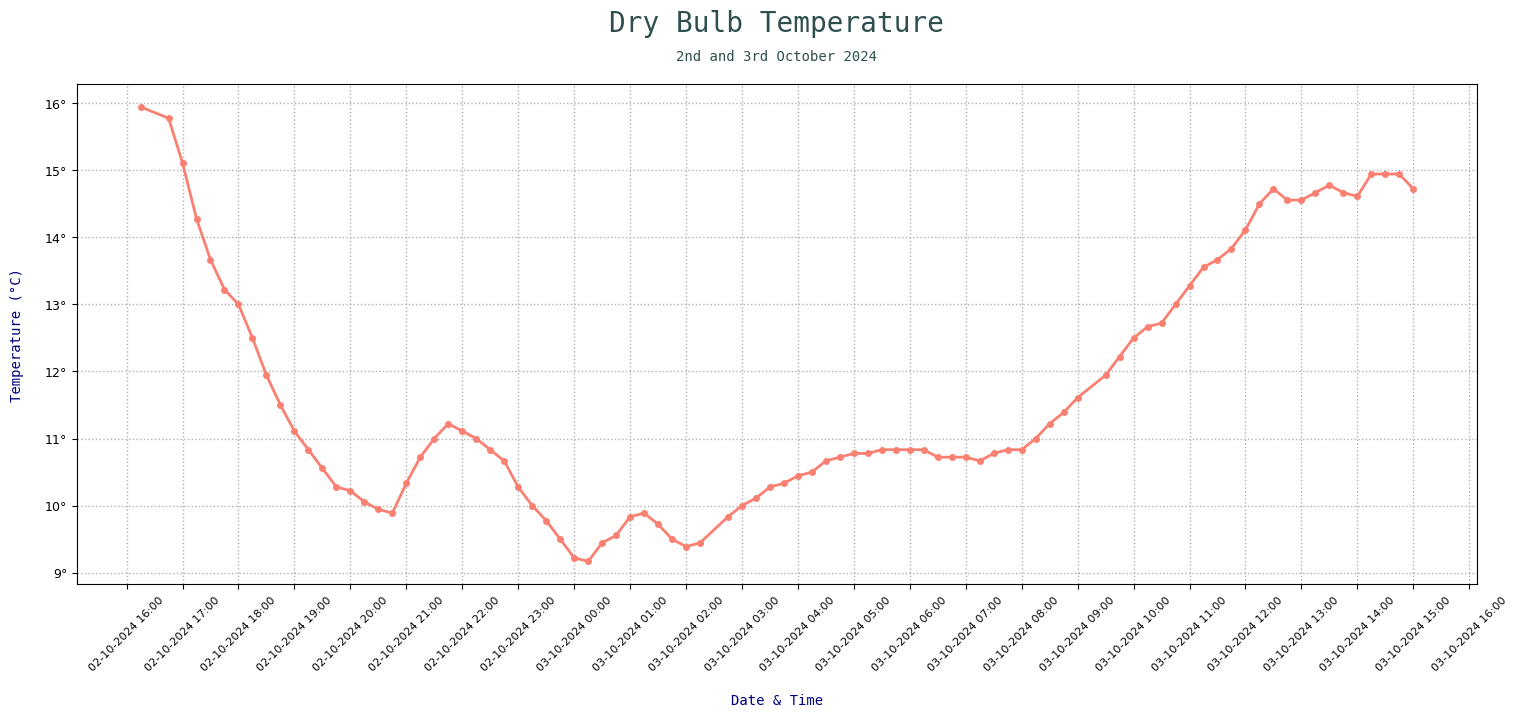

In [80]:
# Create plot figure and add axes
# https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.add_axes.html
fig = plt.figure(figsize=(14, 5))
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(df['reportStartDateTime'], df['dryBulbTemperature_Celsius'], color='salmon', linewidth=2, marker='o', markersize=4, label='Dry Bulb Temperature')

# Set titles and labels with custom fonts
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/text_fontdict.html
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/fonts_demo.html
font1 = {'family': 'monospace', 'color': 'darkslategrey', 'size': 20}
font2 = {'family': 'monospace', 'color': 'navy', 'size': 10}
font3 = {'family': 'monospace', 'color': 'darkslategrey', 'size': 10}

# Create a title and subtitle using ax.text
ax.text(0.5, 1.15, 'Dry Bulb Temperature', fontdict=font1, ha='center', va='top', transform=ax.transAxes)
ax.text(0.5, 1.07, '2nd and 3rd October 2024', fontdict=font3, ha='center', va='top', transform=ax.transAxes)

# Define labels
ax.set_xlabel('Date & Time', fontdict=font2, labelpad=15)
ax.set_ylabel('Temperature (°C)', fontdict=font2, labelpad=15)

# Format axes' ticks
# https://www.geeksforgeeks.org/matplotlib-dates-dateformatter-class-in-python/
# https://stackoverflow.com/questions/43368302/matplotlib-hourlocator-steals-my-x-labels
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1)) 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y %H:%M'))
plt.xticks(rotation=45)  
ax.tick_params(axis='x', which='both', labelsize=8, labelcolor='black')
ax.tick_params(axis='y', which='both', labelsize=9, labelcolor='black')

# Customise the temperature format, grid & layout
# https://techoverflow.net/2022/06/19/matplotlib-how-to-format-angle-in-degrees/
def format_degrees(value, pos=None):
    return f'{value:.0f}°'

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(format_degrees))
ax.grid(True, which='both', linestyle='dotted', linewidth=1)

# Show plot
plt.show()

---
### End